## Project WebStats


## Data preparation

In [4]:
#Importing some of the required packages for assignment.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



We use pandas to import the training and test datasets and to transform them into a DataFrame object for further manipulation. We also concatenate the test data, which is split over multiple CSV files into a single test DataFrame and further will report scores on combined test files rather than reporting averaging test scores over multiple tests sets for simplicity reasons.  

In [5]:
#Loading training and test data
training_data = pd.read_csv("webStats_train.csv", header=None)

test_files = [file for file in os.listdir() if 'test' in file] #retrieving test files
files = []

for file in test_files:
    files.append(pd.read_csv(file, header=None)) 

test_data = np.concatenate(files, axis=0) #combine test files together
test = pd.DataFrame(test_data)

training = pd.DataFrame(training_data)
training



,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before proceeding with the predictive_target variable split, we normalize the data (except target label data (column 280)). With 280 features, we may expect that some of them are measured within different ranges; features that are measured at different scales do not contribute equally to the analysis at some algorithms like K neighbours. Therefore it would make sense to normalize the data to equalize the range and data variability for predictive variables. We will use the MinMax normalization method.

In [6]:
#Data normalization.
combined_tr_tst = pd.concat([training, test])
y=combined_tr_tst.iloc[:,-1:]
x=combined_tr_tst.iloc[:,:-1]
normalized_x=(x-x.min())/(x.max()-x.min()) #We use MinMax normalization method.
normalized_x=normalized_x.replace(np.nan,0) #To avoid Nan that appeared in minmax normalization of data
normalized_x["280"]=y


training = normalized_x.iloc[:52397,:]
test = normalized_x.iloc[52398:,:]
training

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,0.029394,0.00000,0.045455,0.016145,0.025114,0.024849,0.043269,0.0,0.023174,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,0.029394,0.00000,0.045455,0.016145,0.025114,0.024849,0.043269,0.0,0.023174,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Further, we apply some methods to get more knowledge of the dataset and check whether all of the features are of a required data type (numeric).

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52397 entries, 0 to 52396
Columns: 281 entries, 0 to 280
dtypes: float64(281)
memory usage: 112.7 MB


In [8]:
training.describe() #Column 280 target variable was not standardized

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,0.035134,0.083668,0.000494,0.166269,0.018784,0.034370,0.077766,0.000196,0.181647,0.009914,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.000876,0.0,0.000699,0.000433,6.764719
std,0.070477,0.111470,0.009422,0.215964,0.052967,0.072857,0.107318,0.009422,0.225666,0.040422,...,0.376798,0.368676,0.361388,0.294800,0.284627,0.010575,0.0,0.015466,0.011439,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.002036,0.009321,0.000000,0.014188,0.000000,0.002014,0.008553,0.000000,0.015449,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.009469,0.034594,0.000000,0.079256,0.003044,0.009377,0.030738,0.000000,0.084972,0.001701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.035901,0.138431,0.000000,0.233855,0.011416,0.036141,0.127114,0.000000,0.271770,0.003401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1424.000000


In [9]:
set(training.dtypes) # All records in the training set belong to float dtype. No corrections needed.

{dtype('float64')}

In [10]:
set(test.dtypes) # All records in the test set belong to float dtype. No corrections needed.

{dtype('float64')}

Further we seperate the target (label) variable from the predicitive variables for both the training and test set.

In [11]:
#Extracting the last column (target variable) for training set
target_variable = training.iloc[:,-1:]
target_variable

,280
0,1.0
1,0.0
2,0.0
3,1.0
4,27.0
...,...
52392,0.0
52393,0.0
52394,0.0
52395,0.0


In [12]:
#Extracting the last column (target variable) for test set
test_target_variable = test.iloc[:,-1:]
test_target_variable

,280
1,7.0
2,2.0
3,0.0
4,0.0
5,0.0
...,...
7619,0.0
7620,0.0
7621,1.0
7622,58.0


In [13]:
#Extracting features for training set
predictive_variables = training.iloc[:,0:-1]
predictive_variables

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035901,0.09625,0.000000,0.196184,0.011416,0.035070,0.090234,0.0,0.264747,0.005102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,0.029394,0.00000,0.045455,0.016145,0.025114,0.024849,0.043269,0.0,0.023174,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,0.029394,0.00000,0.045455,0.016145,0.025114,0.024849,0.043269,0.0,0.023174,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Extracting features for test set
test_predictive_variables = test.iloc[:,0:-1]
test_predictive_variables

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
1,0.110335,0.231603,0.000000,0.521037,0.066210,0.097882,0.174601,0.0,0.344803,0.033163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.110335,0.231603,0.000000,0.521037,0.066210,0.097882,0.174601,0.0,0.344803,0.033163,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000232,0.000945,0.000000,0.000978,0.000000,0.000295,0.000937,0.0,0.000702,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.002025,0.008910,0.000000,0.021526,0.000761,0.002326,0.008358,0.0,0.025983,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,0.002036,0.015041,0.000000,0.049902,0.000761,0.002200,0.013132,0.0,0.065309,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7620,0.038690,0.135120,0.000000,0.310176,0.015221,0.036141,0.123942,0.0,0.332163,0.003401,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7621,0.204988,0.297883,0.012397,0.223581,0.184170,0.179367,0.375401,0.0,0.283006,0.017007,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7622,0.110335,0.231603,0.000000,0.521037,0.066210,0.097882,0.174601,0.0,0.344803,0.033163,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Part 2 Regression. Linear Regression

Linear Regression (Ordinary Least Squares) is a fundamental method of regression. It seeks to find parameters that minimise the Mean Squared Error (MSE) between predictions and true regression targets on the training set. While linear regression is devoid of parameters, it fails to control the complexity of a model. 

In [15]:
#Importing further required packages
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV #To find the optimum values of alpha hyperparameter

In [16]:
#Assigning attributes+target labels
X, y = predictive_variables, target_variable

Z,b = test_predictive_variables, test_target_variable #We will evaluate performance on the combined test dataset

X_train, y_train = X,y
X_test, y_test = Z,b

#Fit model
lr = LinearRegression(normalize=True).fit(X_train, y_train) #Data anyway is normalized

#We use .score(method) for reporting R^2 as in scikit learn for regression the default is R^2.
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))) 

#MSE reporting. We run it on the test set.
linear_prediction = lr.predict(Z)  
model_error = mean_squared_error(b, linear_prediction)
print(f"The mean squared error model is {model_error:.2f}")

#MAE reporting. We run it on the test set.
model_error = mean_absolute_error(b, linear_prediction)
print(f"The mean absolute error of the model is {model_error:.2f}")


Training set score: 0.36
Test set score: 0.30
The mean squared error model is 647.78
The mean absolute error of the model is 8.41


### R squared score 
As we can see the R squared score for the test set is quite low (0.30) and is close to the training set score (0.36). This may imply that our linear regression model performs relatively bad and we are likely to underfit.

### MSE

The MSE of the model is 647.78, which looks relatively high. However, it will need to be compared to the MSE of Ridge and the MSE of Lasso to evaluate the model's performance. But at the moment it could be interpreted that our model in predicting the number of comments misses the true value of comments by 647.78 comments.

### MAE 

The MAE of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. In our case the value is 8.41. It will have to be compared to the MAEs of Ridge and Lasso to assess relative model performance.

Considering the case of underfitting, we proceed with an alternative method of linear regression. This method chooses parameters to predict considerably on the training data, and also adjusts for an additional constraint.

# Part 2 Ridge 


The parameters for grid search were chosen on the basis of optimum runtime. We ran cross validation on both 10 and 5. Since the value was the same, we chose to proceed with 5 to ensure optimum runtime.

Ridge regression helps prevent overfitting, by penalizing model complexity with L2 regularization. This type of regression purposedly minimizes the magnitude of coefficients, so that they are close to zero.

In [17]:
param_grid = {'alpha': np.logspace(-3, 3, 14)} 
grid = GridSearchCV(Ridge(), param_grid = param_grid, return_train_score=True, cv=5) 
grid.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

In [18]:
#Reporting R^2. grid.score() returns R^2
print("Train set R^2 score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(grid.score(X_test, y_test))) 

#Reporting the optimum parameters for the model.
print("Best parameters: {}".format(grid.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) #is the average of all cv folds for a single combination of the specified parameters

#Reporting MSE
ridge_prediction = grid.predict(Z) 
model_error = mean_squared_error(b, ridge_prediction)
print(f"The mean squared error model is {model_error:.2f}")

#Reporting MAE
model_error = mean_absolute_error(b, ridge_prediction) #calculating MAE on test dataset
print(f"The mean absolute error of the model is {model_error:.2f}")


Train set R^2 score: 0.36
Test set R^2 score: 0.31
Best parameters: {'alpha': 14.251026703029993}
Best cross-validation score: 0.14
The mean squared error model is 644.32
The mean absolute error of the model is 8.56


After trying all possible combinations of the parameters of interest (alpha for Ridge) it could be observed that the optimal value of alpha for this dataset is 14.251026703029993. Here higher alpha means a more restricted model, so coefficient values will be closer to zero.

### R squared score

The R squared score for the test set for Ridge has slightly improved as compared to LR, with R^2 increasing from 0.30 to 0.31. Which means that our generalizability increased with the Ridge despite no performance increase for training set increasing. 

### MSE

The MSE of the model is 644.32, showing a slight decrease from Linear Regression (647.78).

### MAE

The MAE is 8.56, slightly higher than for Linear Regression (8.41).

Overall we can conclude that Ridge perform slightly better compared to Linear Regression in terms of r square and MSE. However, Ridge regression also has a slighly higher MAE, which suggests that the regression is worse at predicting values than LR. Given this, it is difficult to state which one performs better. 

#### To report the required learning plots and graphs, the code snippets were taken from Wednesday 10/11 lecture notebook, credit to Stevan Rudinac and Andreas Muller for providing sample code.

<ipython-input-19-28686bc54db4>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-19-28686bc54db4>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


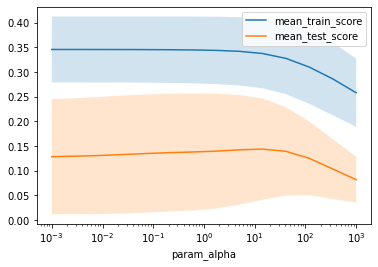

In [19]:
#Seeing how the performance of the model changes based on the changes in alpha
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

The graph illustrates how the variance in the parameter alpha influences the overall performance of the ridge regression. We can notice that with smaller values of alpha the performance score is not changing as much. The highest score for the test set is a bit above 10^1. As it was noted earlier higher values of alpha mean that the model becomes simpler with smaller magnitudes of coefficients. With values of alpha above 10^1 the ability to accurately predict decreases for both train and test sets. Hence after 10^1, the model becomes too simple and will cause underfitting.

Text(0, 0.5, 'R^2')

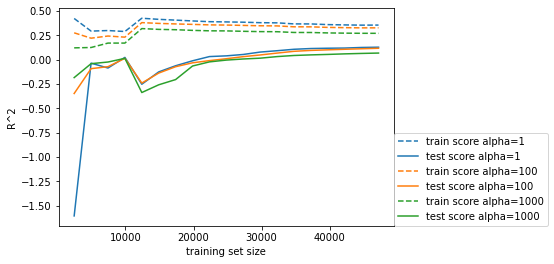

In [20]:
#Reporing learning curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1") #Little regularization and poorer perfromance on the small datasample
plot_learning_curve(Ridge(alpha=100), "alpha=100")
plot_learning_curve(Ridge(alpha=1000), "alpha=1000")


plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

As it could be expected, training score is higher than the test score regardless of alpha level. Out of all alpha levels, alpha=1 produces best performance for training set. Here, alpha=100 comes second and alpha=1000 comes last in terms of performance. For test scores, the smallest alpha level=1 has marginally better performance at maxmium training set size, but it also has significantly lower performance at minimum training set size. Interestingly, the test score of R^2 amongst all alpha values is negative for most training set sizes, which means that with the constraints the ridge regression produces worse results than a horizontal line if the data set is smaller. It could also be noted that with growing training set size all models improve and so the overall effect of regularization will be less significant with greater data sets as it is in this case.That's why even with our optimal alpha the impact on the R^2 in comparison to Linear Regression is very small. 

# Part 2 Lasso

Using Lasso restricts coefficients to be close to zero, in a way called L1 regularization. When using the Lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model (features selection). For GridSearch_CV for hyperparameter tuning, we set up the following parameters for alpha search as the previous testing demonstrated that performance is minimized after alpha=10^-1 and does not improve afterwards, so we set up such parameters for optimum runtime (- 3 to 0) while obtaining the required results. CV=5 was chosen as higher CV did not change search results (runtime optimization). max_iter=1e6 was set for optimization purposes.

In [21]:
param_grid_lasso = {'alpha': np.logspace(-3, 0, 14)} 
grid_lasso = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid_lasso, return_train_score=True, cv=5) #to get optimum rinning time
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=1000000.0, normalize=True),
             param_grid={'alpha': array([0.001     , 0.00170125, 0.00289427, 0.00492388, 0.00837678,
       0.01425103, 0.02424462, 0.04124626, 0.07017038, 0.11937766,
       0.20309176, 0.34551073, 0.58780161, 1.        ])},
             return_train_score=True)

In [22]:
#Reporting R^2.
print("Train set R^2 score: {:.2f}".format(grid_lasso.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(grid_lasso.score(X_test, y_test))) 

#Reporting optimum parameters for the model.
print("Best parameters: {}".format(grid_lasso.best_params_)) #best parameters methods will provide us with needed parameters
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))

#Reporting MSE
lasso_prediction = grid_lasso.predict(Z) 
model_error = mean_squared_error(b, lasso_prediction)
print(f"The mean squared error model is {model_error:.2f}")

#Reporting MAE
model_error = mean_absolute_error(b, lasso_prediction) #calculating MAE on test dataset
print(f"The mean absolute error of the model is {model_error:.2f}")


Train set R^2 score: 0.34
Test set R^2 score: 0.32
Best parameters: {'alpha': 0.008376776400682925}
Best cross-validation score: 0.17
The mean squared error model is 636.61
The mean absolute error of the model is 6.85


After trying all possible combinations of the parameters of interest (alpha for Lasso) it could be observed that the optimal value of alpha for this dataset is 0.008376776400682925. Alpha is a parameter that tunes the complexity of the model
For Lasso, a higher value of alpha means a simpler model, therefore a tendency to underfit. This is because the higher the alpha, the most feature coefficients are zero. When alpha = 0, we obtain Ordinary Least Squares. 


## R squared score

The R squared score for the test set for Lasso has slightly improved as compared to LR and Ridge with R^2 increasing to 0.32. This means that our generalizability increased with the Lasso despite performance for training set decreasing.
The performance on the training test is lower compared to the previous models. We are interested in how the model predicts the popularity of individual news items for an unknown set of data, therefore we conclude that Lasso regression is the model with the highest generalizability. 

## MSE

The MSE of the model is 636.61, showing a decrease from Linear Regression and Ridge. This means that Lasso makes better predictions on the target variable as compared to the other linear models. But we still miss the true value of comments by approximately 636.61

## MAE

The MAE is 6.85, slightly lower than for Linear Regression and Ridge.

Overall we can conclude that Lasso performs better compared to Linear Regression and Ridge in terms of r square, MSE, and MAE. Therefore, we should keep this model for estimating the popularity of news items.

<ipython-input-23-5a97111d682a>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-23-5a97111d682a>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


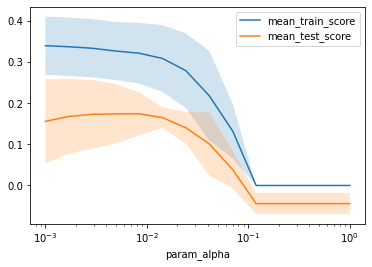

In [23]:
#Seeing how the performance of the model changes based on the changes in alpha
results = pd.DataFrame(grid_lasso.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

The graph shows how the performance of the model changes based on the changes in alpha. We visualize that for the test score, the highest r squared is just less than 10 ^-2. The performance sharply drops at a certain threshold and we notice that after a certain alpha parameter, the performance neither increases or decreases. 
As mentioned above, higher value of alpha translates in a simpler model, where many features coefficients become zero. We note that this simplicity is reflected as a sharp drop in performance for the model, both for the train set and the test set.

Text(0, 0.5, 'R^2')

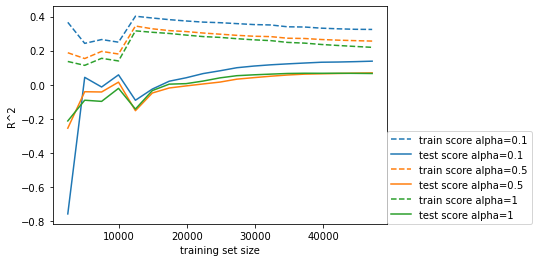

In [24]:
#Learning curve
plot_learning_curve(Lasso(alpha=0.1), "alpha=0.1") #Optimal Alpha is even further smaller
plot_learning_curve(Lasso(alpha=0.5), "alpha=0.5")
plot_learning_curve(Lasso(alpha=1), "alpha=1")


plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

The training score is higher than the test score for all levels of alpha.
In the training score, we clearly see that alpha = 0.1 performs better for different training sizes compared to the other levels of alpha, followed by alpha = 0.5 and alpha = 1. This reinforces what stated above that with higher alpha the performance of the model decreases.
For a very low size of training set, we see that the test score with alpha = 0.1 performs significantly worse compared to the other 2 levels. As the training set size increases, it improves its performance and performs better for all other sizes of the trainig set as compared to alpha = 0.5 and alpha = 1.
Another interesting aspect of the learning curves is the decrease in training score performance. If more data
is added, it becomes harder for a model to overfit, or memorize the data.

In conclusion, we saw that Lasso performs similarly as the other 2 previously examinated, although with a slightly better result on the r squared, MAE and MSE. To predict how many comments willbe posted on a page, Lasso should be used.

# Part 3 Classification - Data Preparation

We convert the integer-valued target variable into two classes using the thresholds: Not-Popular = 0. Popular ≥ 1. 
For kNN classification, we need a target categorical variable, (Popularity),
which is partitioned into predetermined classes or categories. The data mining model examines a large set of records, each record containing information on the target variable as well as a set of
input or predictor variables. We would like to be able to classify the popularity of variables not currently in the database, based on the other predictors of our dataset.


##### Note:
After running the data transformation code bellow in order to work with regression again you will need to reupload the data at the top of this notebook (Data Preparation Part)

In [25]:
#Transforming the training dataset
target_variable["280"][target_variable['280'] >= 1] = "Popular"
target_variable["280"][target_variable['280'] == 0] = "Not-Popular"
print(target_variable)


               280
0          Popular
1      Not-Popular
2      Not-Popular
3          Popular
4          Popular
...            ...
52392  Not-Popular
52393  Not-Popular
52394  Not-Popular
52395  Not-Popular
52396  Not-Popular

[52397 rows x 1 columns]


/Users/sushrutmunje/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-25-e13273cf9b5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_variable["280"][target_variable['280'] == 0] = "Not-Popular"


In [26]:
#Transforming the test dataset
test_target_variable['280'][test_target_variable['280'] >= 1] = "Popular"
test_target_variable['280'][test_target_variable['280'] == 0] = "Not-Popular"
print(test_target_variable)

              280
1         Popular
2         Popular
3     Not-Popular
4     Not-Popular
5     Not-Popular
...           ...
7619  Not-Popular
7620  Not-Popular
7621      Popular
7622      Popular
7623  Not-Popular

[7623 rows x 1 columns]


/Users/sushrutmunje/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-26-67c349b0c4f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_target_variable['280'][test_target_variable['280'] == 0] = "Not-Popular"


We converted the target variable from numerical to categorical for both the training set and the test set as we will perform classification analysis for both groups.

For data manipulation and as a result of the debugging process, the variables that will be used are converted to numpy arrays using the to_numpy() function.

In [27]:
target_variable_1=target_variable.to_numpy()
test_target_variable_1=test_target_variable.to_numpy()
predictive_variables_1=predictive_variables.to_numpy()
test_predictive_variables_1=test_predictive_variables.to_numpy()



##  KNN neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [29]:
#Reassigning features+target variable to avoid confusion with Regression
A, g = predictive_variables_1, target_variable_1
K,m = test_predictive_variables_1, test_target_variable_1
X_train, y_train = A,g
X_test, y_test = K,m

For Knn GridSearch_CV hyperparameter tuning, we set up the following parameters for an optimum number of neighbours searches: (1, 15, 4) for the optimum runtime was chosen and for the maximisation of predictability for test set. CV=5 was chosen as higher CV did not change search results (runtime optimization).

In [32]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors':  np.arange(1, 15, 4)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, return_train_score=True, cv=5)
grid_knn.fit(X_train, np.ravel(y_train,order='C'))


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  5,  9, 13])},
             return_train_score=True)

In [33]:
#Reporting accuracy scores
print("Train set accuracy score: {:.2f}".format(grid_knn.score(X_train, y_train)))
print("Test set accuracy score: {:.2f}".format(grid_knn.score(X_test, y_test)))

#Reporting the optimum parameters and cross validation score
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

Train set accuracy score: 0.78
Test set accuracy score: 0.77
Best parameters: {'n_neighbors': 13}
Best cross-validation score: 0.56


#### Grid Search results:
Based on the grid search results, the optimum model for which the accuracy on the test set is maximized is where a number of neighbours': 13. The accuracy scores are following: Train = 0.78, Test = 0.77. We could say that the Train and Test set scores are close and not that high, which indicates relatively poor model performance. Cross-validation score: 0.56 also is relatively low.

## Part 2 SVM model 

For working with a Support vector classifier, we first have to perform some data transformation with NumPy arrays. The bellow code achieves that.

In [34]:
#Working with shapes to adjust for SVM errors 
print(X_train.shape)
l = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
print(l.shape)
print(y_train.shape)
yl = np.array([0,1,0,1,0,1])
print(yl.shape)
y_train_1=y_train.reshape(len(y_train),)
print(y_train_1.shape)
y_train_1=y_train.reshape(len(y_train),)
print(y_train_1.shape)
y_test_1=y_test.reshape(len(y_test),)
print(y_test_1.shape)

(52397, 280)
(6, 2)
(52397, 1)
(6,)
(52397,)
(52397,)
(7623,)


In [35]:
#Fitting the model with the default parameters
svm = LinearSVC()
svm.fit(X_train, y_train_1)

#Reporting the accuracy scores.
print("Train set accuracy score: {:.2f}".format(svm.score(X_train,  y_train_1)))
print("Test set accuracy score: {:.2f}".format(svm.score(X_test, np.ravel(y_test_1,order='C')))) #Generalizes quite well


Train set accuracy score: 0.77
Test set accuracy score: 0.80


/Users/sushrutmunje/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Overall we can observe the following accuracy scores: Training:0.77, Test:0.80. Compared to KNN Linear Support vector classifier performs slightly worse on the training set but performs better on the test set, indicating the greater generalizability of the results obtained through this model.

#### Conclusion: 
We notice that overal performance of the regression models on prediciting the number of comments is quite poor. This could be due to datapreprocessing model, it could result that many of the selected features do not have significant relation to target variable. Additionally we potentially would need a feture engineering process to determine whether the interaction effects were present, all of this could potentially lead to an imporvment in a performance of the model.

Speaking of classification problems we observe that both Knn and SVC performed relatively okay. However, given the simplicity of the classification task we stil would have expected performance. Again the potential reasons could be that two many unimportant features were considered and hence additional data preprocessing activities could help to improve the performance.